## In this task, we will try to predict if a patient has Sepsis 

In [1]:
import pandas as pd



import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt

train_features = pd.read_csv("extract_new_feature/train_new_features.csv").sort_values(by='pid')
#test = pd.read_csv("extract_new_feature/test_imputed.csv").sort_values(by='pid')
train_labels = pd.read_csv("data_imputation/train_labels.csv").sort_values(by='pid')
data = pd.concat([train_features, train_labels], axis=1, sort=False)

/home/aizardar/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data.head(25)

ABPd_minimum  ABPd_maximum   ABPd_mean   ABPd_std  ABPd_median  \
0           39.0         62.50   50.250000   7.101536        48.50   
1           58.0         79.00   70.666664   6.582806        72.00   
2           40.0         70.00   51.333332   9.810323        50.00   
3           42.0         55.50   48.833332   3.472838        49.50   
4           90.5        142.00  108.833336  13.350746       107.50   
5           64.0         99.00   83.833336  10.320618        83.50   
6           48.0         68.00   56.791668   7.349886        56.25   
7           64.0         69.75   66.520836   2.172813        66.00   
8           58.0         58.00   58.000000   0.000000        58.00   
9           59.0        105.00   71.333336  11.934163        69.00   
10          51.0         66.00   57.291668   3.480193        56.75   
11          42.0         58.00   49.250000   5.154433        48.50   
12          52.0         74.00   62.250000   8.462484        60.75   
13          62.0         88.00   71.833336   9.446821        68.50   
14          58.0         58.00   58.000000   0.000000        58.00   
15          46.0         74.00   54.375000   8.194025        52.00   
16          63.0         86.00   73.916664   8.240237        76.00   
17          54.0         62.00   58.333332   2.386832        58.00   
18          49.0         64.00   56.625000   6.990659        56.00   
19          59.0         98.00   76.500000  10.074720        77.25   
20          71.0        111.00   87.625000  12.717427        85.25   
21          58.0         58.00   58.000000   0.000000        58.00   
22          44.5         71.00   53.125000   8.557626        50.50   
23          39.0         52.00   44.958332   5.395530        44.50   
24          35.0         48.00   42.583332   4.294993        43.00   

    ABPd_skewness  ABPd_kurtosis  ABPm_minimum  ABPm_maximum   ABPm_mean  ...  \
0        0.585977      -0.324842          53.0          84.0   68.333336  ...   
1       -0.654300      -0.527748          84.0         106.0   95.583336  ...   
2        1.156444       0.616139          56.0         164.0   80.333336  ...   
3       -0.191725       0.842687          60.0          73.0   65.750000  ...   
4        1.305234       2.736731         117.0         169.0  144.333328  ...   
5       -0.300499      -0.367147          83.0         120.0  101.583336  ...   
6        0.175260      -1.740744          53.0         120.0   79.916664  ...   
7        0.620673      -1.041000          74.0          97.0   82.333336  ...   
8        0.000000       0.000000          74.0         104.0   87.750000  ...   
9        2.218312       6.296253          73.0         112.0   90.666664  ...   
10       1.105117       3.906779          76.0         122.0   85.500000  ...   
11       0.165197      -0.899260          54.0          80.0   66.250000  ...   
12       0.260428      -1.468807          68.0          92.0   79.416664  ...   
13       0.880029      -0.749728          80.0         111.0   94.916664  ...   
14       0.000000       0.000000          53.0         100.0   76.833336  ...   
15       1.252608       1.756492          69.0         107.0   77.583336  ...   
16      -0.023448      -1.462157          62.0         117.0   93.833336  ...   
17       0.007131      -0.203169          68.0          82.0   75.000000  ...   
18       0.007349      -2.169327          57.0          83.0   67.750000  ...   
19       0.333487       1.042582          84.0         118.0  100.166664  ...   
20       0.817850      -0.490259          92.0         148.0  120.083336  ...   
21       0.000000       0.000000          49.0          82.0   69.500000  ...   
22       1.140609       0.523597          55.0          76.0   64.250000  ...   
23       0.142311      -1.883058          52.0          69.0   62.083332  ...   
24      -0.813038      -0.191249          61.0          77.0   65.500000  ...   

    LABEL_Lactate  LABEL_TroponinI  LABEL_SaO2  LABEL_Bilirubin_direct  \
0 

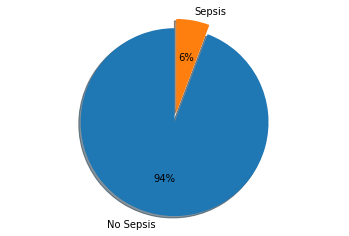

In [3]:
# Let's see the percentage of people suffering from Sepsis

df = train_labels['LABEL_Sepsis'].value_counts()
No_sepsis_percent = (df[0]/(df[0]+df[1]))*100
sepsis_percent = (df[1]/(df[0]+df[1]))*100

labels = 'No Sepsis', 'Sepsis'
sizes = [No_sepsis_percent, sepsis_percent]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.0f%%', shadow=True, startangle = 90)
ax1.axis('equal')
plt.show()


### 94% Patients are not suffering from Sepsis. This shows that we are dealing with highly imbalanced data here 

## We will use all features

In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import metrics


# Let's define a function to plot a ROC curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 
    


TESTS = ['LABEL_Sepsis']

auc_values_val_rf = []
auc_values_val_svc = []
auc_values_val_gb = []

for label in TESTS:
    
    print(label)
    
    X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels[label], test_size=0.2, random_state=2020, stratify = train_labels[label])

    # Normalize the input features using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1.

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = train_features.columns)
    X_val_scaled = scaler.transform(X_val)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns = train_features.columns)


    feature_cols = X_train.columns.values[(X_train.columns.values != 'pid') & (X_train.columns.values != 'Time')]

    X_train = X_train[feature_cols]
    X_val = X_val[feature_cols]
    
    feature_cols_scaled = X_train_scaled.columns.values[(X_train_scaled.columns.values != 'pid') & (X_train_scaled.columns.values != 'Time')]

    X_train_scaled = X_train_scaled[feature_cols]
    X_val_scaled = X_val_scaled[feature_cols]
    
    
    
    
    forest_clf = RandomForestClassifier(random_state=42)
    svc = SVC(kernel = 'rbf', random_state=42, probability=True)
    gb = GradientBoostingClassifier(random_state = 42)
    
    
    skf = StratifiedKFold(n_splits=5)
    auc_scores_rf = cross_val_score(forest_clf, X_train, y_train, scoring = 'roc_auc', cv = skf, n_jobs = -1)
    auc_scores_svc = cross_val_score(svc, X_train_scaled, y_train, scoring = 'roc_auc', cv = skf, n_jobs = -1)
    auc_scores_gb = cross_val_score(gb, X_train, y_train, scoring = 'roc_auc', cv = skf, n_jobs = -1)

    
#    print("AUC scores = ", auc_scores)
    print("Mean Cross-validated AUC score (RF)= ", np.mean(auc_scores_rf))
    print("Mean Cross-validated AUC score (SVC)= ", np.mean(auc_scores_svc))
    print("Mean Cross-validated AUC score (GB)= ", np.mean(auc_scores_gb))
    print("-----------------------------------------------------")
    
    # Let's check models performance on Validation set 
    
    forest_clf.fit(X_train, y_train)
    svc.fit(X_train_scaled, y_train)
    gb.fit(X_train,y_train)
    
    predictions_prob_val_rf = forest_clf.predict_proba(X_val)
    predictions_prob_val_svc = svc.predict_proba(X_val_scaled)
    predictions_prob_val_gb = gb.predict_proba(X_val)

    
    predict_prob_val_rf = np.ravel(predictions_prob_val_rf[:,1])
    predict_prob_val_svc = np.ravel(predictions_prob_val_svc[:,1])
    predict_prob_val_gb = np.ravel(predictions_prob_val_gb[:,1])

    
    
    fpr, tpr, thresholds_rf = roc_curve(y_val,predict_prob_val_rf)
    fpc, tpc, thresholds_svc = roc_curve(y_val,predict_prob_val_svc)
    fpgb, tpgb, thresholds_gb = roc_curve(y_val,predict_prob_val_gb)
    
        
        
    plot_roc_curve(fpr, tpr, "RF")
    plot_roc_curve(fpc, tpc, "SVC")
    plot_roc_curve(fpgb, tpgb, "GB")

    
    
    
    plt.legend(loc="lower right")
    plt.show()

    auc_val_rf = metrics.roc_auc_score(y_val, predict_prob_val_rf)
    auc_val_svc = metrics.roc_auc_score(y_val, predict_prob_val_svc)
    auc_val_gb = metrics.roc_auc_score(y_val, predict_prob_val_gb)

    
    
    print("AUC (RF) = ", auc_val_rf)
    print("AUC (SVC) = ", auc_val_svc)
    print("AUC (GB) = ", auc_val_gb)

    
    
    auc_values_val_rf.append((auc_val_rf))
    auc_values_val_svc.append((auc_val_svc))
    print("---------------------------------------------------------------")


LABEL_Sepsis
Mean Cross-validated AUC score (RF)=  0.6968347708271135
Mean Cross-validated AUC score (SVC)=  0.6685562988872227
Mean Cross-validated AUC score (GB)=  0.7173554326575681
-----------------------------------------------------


AUC (RF) =  0.6973687581501758
AUC (SVC) =  0.6579769886429141
AUC (GB) =  0.6944109968769935
---------------------------------------------------------------


## Let's fine tune our RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import metrics


auc_values_val_rf = []

TESTS = ['LABEL_Sepsis']


for label in TESTS:
    
    print(label)
    
    X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels[label], test_size=0.2, random_state=2020, stratify = train_labels[label])

    feature_cols = X_train.columns.values[(X_train.columns.values != 'pid') & (X_train.columns.values != 'Time')]

    X_train = X_train[feature_cols]
    X_val = X_val[feature_cols]
    
    
    forest_clf = RandomForestClassifier(random_state=42)
    skf = StratifiedKFold(n_splits=5)
    
    param_grid = { 
    'n_estimators': [400,800],
    'max_features': ['auto', 'log2'],
    'criterion' :['gini','entropy']}    
    
    CV_rf = GridSearchCV(estimator=forest_clf, param_grid=param_grid, cv = skf, scoring = 'roc_auc', n_jobs = -1)
    
    CV_rf.fit(X_train, y_train)
    forest_clf.fit(X_train, y_train)
    
    #Without fine tuning 
    
    predictions_prob_val = forest_clf.predict_proba(X_val)
    
    predict_prob_val = np.ravel(predictions_prob_val[:,1])
  
    auc_val = metrics.roc_auc_score(y_val, predict_prob_val)
    
    print("AUC (Without fine tuning) = ", auc_val)
    
    # With fine tuning 
    
    print("Best parameters after Grid Search CV")
        
    print(CV_rf.best_params_)                  
    
    predictions_prob_val_rf = CV_rf.predict_proba(X_val)
    
    predict_prob_val_rf = np.ravel(predictions_prob_val_rf[:,1])
  
    auc_val_rf = metrics.roc_auc_score(y_val, predict_prob_val_rf)
    
    print("AUC with best parameters = ", auc_val_rf)
    
    auc_values_val_rf.append((auc_val_rf))
    print("---------------------------------------------------------------")

### Which features contribute the most ?

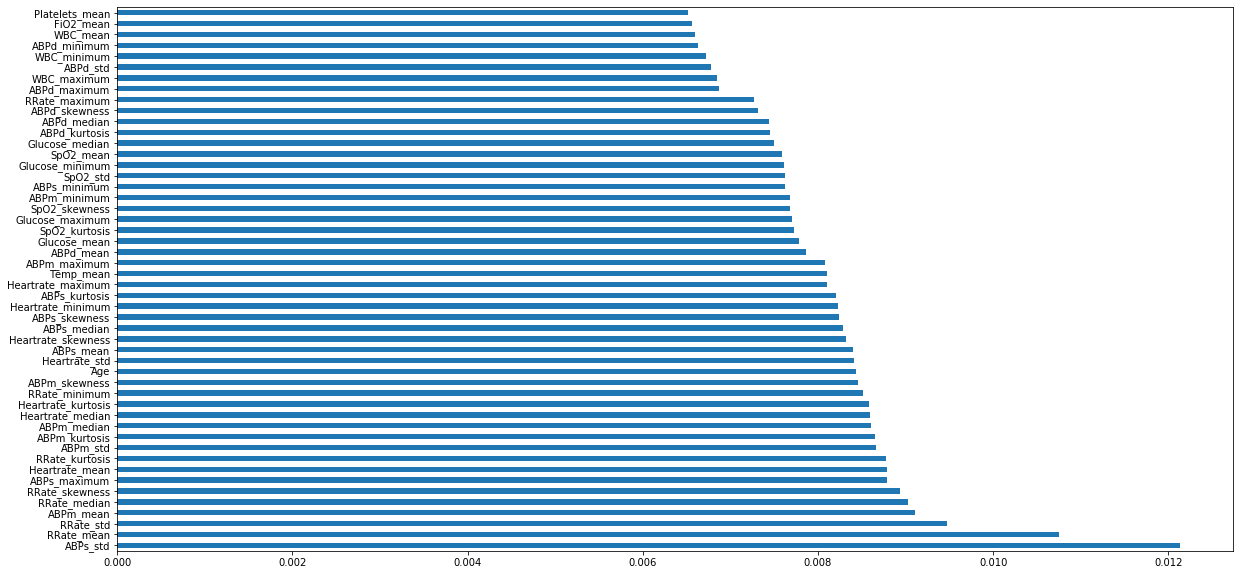

In [5]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
plt.figure(figsize=(20,10))

from sklearn.svm import SVC

feature_cols = train_features.columns.values[(train_features.columns.values != 'pid') & (train_features.columns.values != 'Time')]

X_train = train_features[feature_cols]


model = RandomForestClassifier(n_estimators=400,criterion = 'entropy', max_features = 'log2',random_state=1211)
model.fit(X_train,train_labels['LABEL_Sepsis'])
estimator = model.estimators_[5]
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()